<a href="https://colab.research.google.com/github/HuyenNguyenHelen/INFO5731_Spring2020/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
# Topic Modeling  with LDA Gensim
# Import necessary packages
import pandas as pd
import csv
from nltk.tokenize import RegexpTokenizer
!pip install stop-words
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt

# Open dataset
with open('/content/Huyen_labeled_review_sentiments.csv', 'r', encoding = 'utf-8') as file:
  df = pd.read_csv (file)

# do pre-prossessing
df['review']=df['review'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['review']=df['review'].str.replace('[^\w\s]','')
df['review']=df['review'].str.lower()
df

<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<input>:23: DeprecationWarning: invalid escape sequence \w
<ipython-input-13-a385a04cccfc>:23: DeprecationWarning: invalid escape sequence \w
  df['review']=df['review'].str.replace('[^\w\s]','')


,docID,review,defined sentiment
0,doc1,everi movi come truli make impact joaquin perf...,positive
1,doc2,movi felt alon isol truli relat understand mot...,positive
2,doc3,truli masterpiec best hollywood film one best ...,positive
3,doc4,time movi anticip like end fall short way shor...,positive
4,doc5,joaquin phoenix give tour de forc perform fear...,positive
...,...,...,...
102,doc104,first sorri bad english btw went cinema hype w...,neutral
103,doc105,saw joker last night highli disappoint possibl...,negative
104,doc106,movi rip movi doesnt redeem valu even impli br...,negative
105,doc107,perform joaquin phoenix asid overal movi way o...,negative


In [0]:
# Further preprocessing with stemming and removing stopwords


tokenizer = RegexpTokenizer(r'\w+')
# create English stop words list
en_stop = get_stop_words('en')
stop_plus = ['joker', 'joaquin', 'movi', 'also', 'one', 'film','arthur','movi', 'fleck','heath', 'ledger', 'phoenix', 'joker', 'todd', 'phillip']

# Create PorterStemmer
p_stemmer = PorterStemmer()

# create list of documents
review_set = [review for review in df['review']]

# list for tokenized documents 
texts = []
# loop through document list
for review in review_set:
    # clean and tokenize document string
    tokens = tokenizer.tokenize(review)
    # remove stop words from tokens
    stopped_tokens = [review for review in tokens if review not in en_stop + stop_plus]
    texts.append( stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=60)






Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [0]:
# print topics
for topic in ldamodel.print_topics(num_topics=10, num_words=8):
    print (topic )


(0, '0.016*"best" + 0.011*"far" + 0.009*"see" + 0.009*"ever" + 0.008*"oscar" + 0.008*"might" + 0.008*"fiction" + 0.008*"truli"')
(1, '0.013*"feel" + 0.011*"stori" + 0.009*"charact" + 0.007*"societi" + 0.007*"peopl" + 0.007*"make" + 0.007*"way" + 0.006*"masterpiec"')
(2, '0.011*"thing" + 0.011*"act" + 0.010*"make" + 0.009*"stori" + 0.009*"take" + 0.009*"oscar" + 0.006*"batman" + 0.006*"univers"')
(3, '0.011*"charact" + 0.009*"get" + 0.008*"think" + 0.008*"comic" + 0.007*"see" + 0.006*"book" + 0.006*"man" + 0.006*"say"')
(4, '0.012*"good" + 0.011*"review" + 0.010*"way" + 0.008*"charact" + 0.007*"differ" + 0.007*"stori" + 0.007*"act" + 0.007*"dont"')
(5, '0.010*"like" + 0.009*"made" + 0.008*"stori" + 0.007*"taxi" + 0.007*"origin" + 0.006*"best" + 0.006*"driver" + 0.006*"well"')
(6, '0.014*"like" + 0.011*"time" + 0.011*"charact" + 0.009*"mental" + 0.009*"ill" + 0.008*"feel" + 0.008*"even" + 0.007*"go"')
(7, '0.009*"see" + 0.009*"peopl" + 0.008*"make" + 0.007*"bad" + 0.007*"mr" + 0.006*"ver

**Intepreting topics: **


Topic 1: Joker - an Oscar best movie ever

Topic 2: Joker - to reflect society

Topic 3: Great acting taking Joker to Oscar


Topic 4: Unknown


Topic 5: good review


Topic 6:  story of a taxi driver


Topic 7: metal illness of character


Topic 8: first version


Topic 9: a violent movie won Oscar


Topic 10: unknown

In [0]:
# Visualize results with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(vis, "E:\Helen\TopicsVisualized.html")
vis

<input>:3: DeprecationWarning: invalid escape sequence \H
<input>:3: DeprecationWarning: invalid escape sequence \H
<input>:3: DeprecationWarning: invalid escape sequence \H
<input>:3: DeprecationWarning: invalid escape sequence \H
<input>:3: DeprecationWarning: invalid escape sequence \H
<input>:3: DeprecationWarning: invalid escape sequence \H
<ipython-input-26-f651ed60b98b>:3: DeprecationWarning: invalid escape sequence \H
  pyLDAvis.save_html(vis, "E:\Helen\TopicsVisualized.html")


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.082367 -0.028479       1        1  20.905008
3     -0.057430 -0.056291       2        1  16.069336
7     -0.055088 -0.075076       3        1  14.237228
5     -0.079497  0.055912       4        1  12.266294
9      0.038453  0.086824       5        1  10.541199
1     -0.047783  0.005763       6        1   8.801630
4      0.009738  0.119193       7        1   8.724043
2      0.083894 -0.074113       8        1   4.599606
0      0.085907 -0.013035       9        1   2.432290
8      0.104173 -0.020697      10        1   1.423360, topic_info=         Term       Freq      Total Category  logprob  loglift
1        best  30.000000  30.000000  Default  30.0000  30.0000
196     oscar  16.000000  16.000000  Default  29.0000  29.0000
71       book  21.000000  21.000000  Default  28.0000  28.0000
12        far  11.000000  11.000000  Default  27.0000  27.0000
52       like  45.000000  45.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
328      wine   0.356714   1.890264  Topic10  -5.6611   2.5846
433    critic   0.356714   5.255812  Topic10  -5.6611   1.5620
335  approach   0.356714   2.678840  Topic10  -5.6611   2.2359
220     polit   0.356714   5.085002  Topic10  -5.6611   1.5950
291     venic   0.356714   3.339118  Topic10  -5.6611   2.0156

[753 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1283      6  0.694811  1010oscar
606       1  0.510694    absolut
606       2  0.102139    absolut
606       5  0.204278    absolut
606       6  0.204278    absolut
...     ...       ...        ...
400       6  0.133570        yet
400       8  0.267140        yet
1431      2  0.411139       youd
1431      9  0.411139       youd
719       1  0.821141       youv

[1379 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 8, 6, 10, 2, 5, 3, 1, 9])

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [0]:
#import library and package
import pandas as pd
!pip install stop-words
import seaborn as sns
import matplotlib.pyplot as plt
from stop_words import get_stop_words
stop_words = get_stop_words('en')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


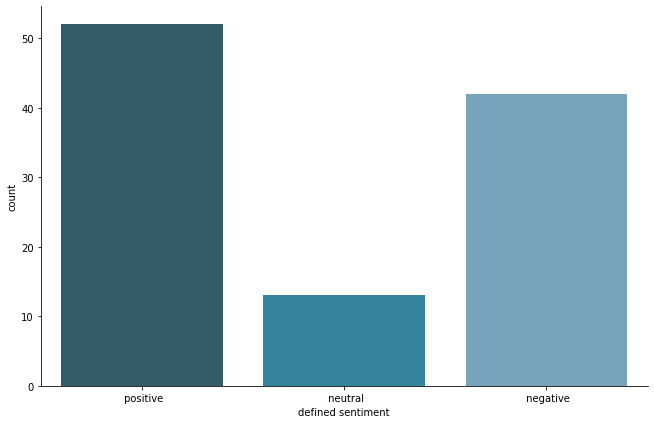

In [0]:
# PREPARE CORPUS
# Open dataset
with open('/content/Huyen_labeled_review_sentiments.csv', 'r', encoding = 'utf-8') as file:
  df = pd.read_csv (file)

# Visualize distributions of anotated sentiments from DS
sns.factorplot(x="defined sentiment", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();







In [0]:
# do pre-prossessing
filtering = ['arthur','movi', 'fleck','heath', 'ledger', 'joaquin', 'phoenix', 'joker', 'phoenix ', 'todd', 'phillip'] # list of most common words in dataset 
df['review']=df['review'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))  # remove digits 
df['review']=df['review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in filtering and stop_words))    # remove stopwords and common words
df['review']=df['review'].str.replace('[^\w\s]','') # remove punctuations
df['review']=df['review'].str.lower()               # lowercase



<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input-61-301f359a91bd>:4: DeprecationWarning: invalid escape sequence \w
  df['review']=df['review'].str.replace('[^\w\s]','') # remove punctuations


In [0]:
# Select features by tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word',lowercase = False, )
features = vectorizer.fit_transform(df['review'])
features_nd = features.toarray() 

In [0]:
# Divide dataset into two corpora for training and testing (80% and 20% respectively)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split( features_nd, df['defined sentiment'],train_size=0.80)

In [0]:
# Model 1: apply Sklearn - logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X=X_train, y=y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# applied model to label test data
y_pred_LR = log_model.predict(X_test)
print('predicted labels:', [y for y in y_pred_LR])
print('anotated labels:', [y for y in y_test])

predicted labels: [' positive', ' positive', ' positive', ' positive', ' negative', ' positive', ' negative', ' positive', ' positive', ' negative', ' positive', ' negative', ' positive', ' positive', ' negative', ' negative', ' positive', ' positive', ' negative', ' positive', ' positive', ' positive']
anotated labels: [' neutral', ' negative', ' positive', ' positive', ' negative', ' positive', ' neutral', ' negative', ' positive', ' positive', ' negative', ' positive', ' negative', ' negative', ' negative', ' neutral', ' positive', ' positive', ' negative', ' positive', ' positive', ' positive']


In [0]:
# Calculate performance of Logistic Regression model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred_LR) * 100
f1 = f1_score(y_test, y_pred_LR, average='macro') *100
precision = precision_score(y_test, y_pred_LR, average='macro') *100
recall = recall_score (y_test, y_pred_LR, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 36.41025641025641
accuracy score: 54.54545454545454
precision score: 34.28571428571428
recall score: 39.77272727272727


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# Model 2: apply MultinomialNB  model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#Use model to label test data 
y_pred_NB = nb_model.predict(X_test)
print('predicted labels:', [y for y in y_pred_NB])
print('anotated labels:', [y for y in y_test])

predicted labels: [' positive', ' positive', ' positive', ' positive', ' positive', ' positive', ' negative', ' positive', ' positive', ' positive', ' positive', ' negative', ' positive', ' positive', ' negative', ' negative', ' positive', ' positive', ' positive', ' positive', ' positive', ' positive']
anotated labels: [' neutral', ' negative', ' positive', ' positive', ' negative', ' positive', ' neutral', ' negative', ' positive', ' positive', ' negative', ' positive', ' negative', ' negative', ' negative', ' neutral', ' positive', ' positive', ' negative', ' positive', ' positive', ' positive']


In [0]:
# calculate performance of  MultinomialNB model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred_NB) * 100
f1 = f1_score(y_test, y_pred_NB, average='macro') *100
precision = precision_score(y_test, y_pred_NB, average='macro') *100
recall = recall_score (y_test, y_pred_NB, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 28.544061302681996
accuracy score: 50.0
precision score: 26.851851851851855
recall score: 34.46969696969697


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Explanation: 
The features were selected by calculate tfidf. The reason for selecting these features because in the corpus there are too many frequency words such as movie, films, names of characters. Although I filtered them out, it would be better if I used tf-idf for generating features rather than bag of words (BoW). BoW is poor performed when dealing with high frequency words. And then I divided data into 2 copora for training (80%) and testing (20%), and then trained on two models: LogisticRegression and MultimialNB. From the results of the two models above, we see that LogisticRegression slightly is better. MultinomialNB model with over 36.4% and 28.8% on F1-score respectively. Performance is not good; this may be due to inequivalent number of Neutral label in training set. I may need to go further to improve their performance. 

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
# Import Train Dataset
import pandas as pd
with open('/content/train.csv', 'r', encoding = 'utf-8') as file:
  data_train = pd.read_csv (file)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#Import Test Dataset
import pandas as pd
with open('/content/test.csv', 'r', encoding = 'utf-8') as file:
  data_test = pd.read_csv (file)
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [0]:
# Calculate some descriptive statistics about Saleprice attribute in training data
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [0]:
# Run correlations between variables toward Saleprice 
corr_matrix = data_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

**Explanation**: Correlation  results from -1 to 1 that 0 means no correlation, and 1 is maximum of correlation to the attribute. From correlation score, we see that  "OverallQual", "GrLivArea", "GarageCars", 'GarageArea', 'TotalBsmtSF'are 5 important features strongly correlated with SalePrice. 



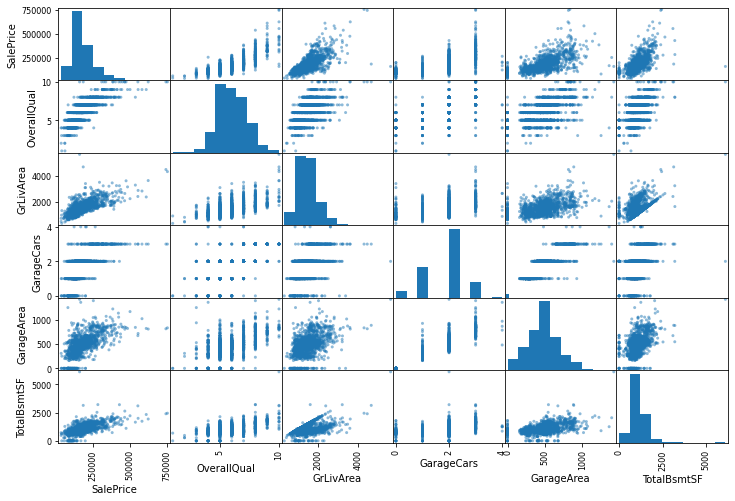

In [0]:
# 5 important features ploted with PriceSale in a scatter_matrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", 'GarageArea', 'TotalBsmtSF']
scatter_matrix(data_train[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

In [0]:
# Deal with Null value
nulls = pd.DataFrame(data_train.isnull().sum().sort_values(ascending=False)[:20])
nulls.columns = ['Null Count']
nulls


,Null Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [0]:
# Drop Null values
import numpy as np
data_train = data_train.select_dtypes(include=[np.number]).interpolate().dropna()
data_test = data_test.select_dtypes(include=[np.number]).interpolate().dropna()



In [0]:
# Prepare data for training and testing (in training Dataset)
y = np.log(data_train.SalePrice)
X = data_train.drop(['SalePrice', 'Id'], axis=1)

In [0]:
# Divide training dataset into 2 parts: 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [0]:
# Apply Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
regressor = linear_model.LinearRegression()

In [0]:
# Fit model into training set
model = regressor.fit(X_train, y_train)

In [0]:
# Calculate R square of built model
print('LinearRegression R squared:', model.score(X_test, y_test))

LinearRegression R squared: 0.8758658336149933


In [0]:
# Test model: Apply built model to predict SalePrice in divided subset for testing
prediction_testing = model.predict(X_test)

In [0]:
# Calculate RMSE score of SalePrice prediction and actual value
print('RMSE: \n', mean_squared_error(y_test, prediction_testing))

RMSE: 
 0.023165113523875673


Explanation:  RMSE score means closer to zero, the better model is. Our result is pretty good.

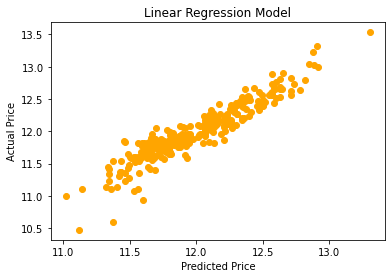

In [0]:
# Visualize to see a comparision of predicted price and actual price on divided subset for testing model 
actual_values = y_test
plt.scatter(prediction_testing, actual_values, alpha=1,
            color='orange') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [0]:
# Apply model to predict unknown SalePrice in Test Dataset
df_prediction = pd.DataFrame()
df_prediction['Id'] = data_test.Id
data_test = data_test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(data_test)

final_predictions = np.exp(predictions)

In [0]:
# Store results
df_prediction['SalePrice'] = final_predictions
df_prediction.to_csv('HouseSalePrice_predictions.csv', index=False)
df_prediction

,Id,SalePrice
0,1461,117002.268384
1,1462,138140.347277
2,1463,167676.575158
3,1464,194355.580811
4,1465,181338.246909
...,...,...
1454,2915,95269.993842
1455,2916,96602.380503
1456,2917,173227.002415
1457,2918,111975.932793
